In [1]:
# Use the following data for this assignment:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import matplotlib.colors as mcol
import matplotlib.cm as cm
from scipy import stats

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


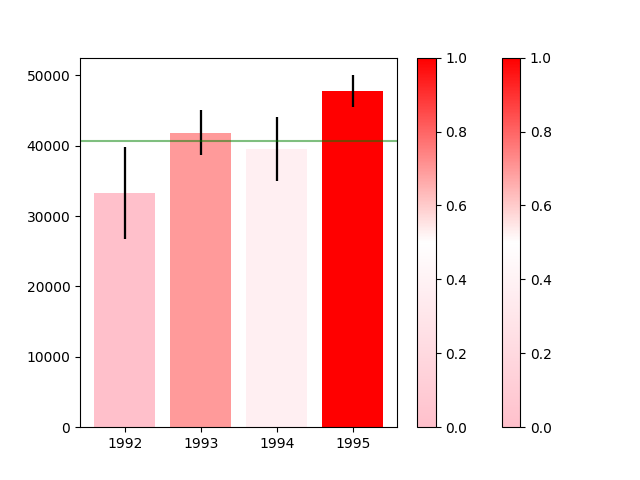

In [2]:
plt.figure()
a=np.mean(df.loc[1992])
a
b=np.mean(df.loc[1993])
b
c=np.mean(df.loc[1994])
c
d=np.mean(df.loc[1995])
d
df.index
mean=[a,b,c,d]
e = df.std(axis = 1)
years=['1992','1993','1994','1995']
x = e / np.sqrt(df.shape[1]) * stats.t.ppf(1-0.05/2, df.shape[1]-1)
bars=plt.bar(df.index,mean,align='center',yerr=x)
plt.xticks(df.index,years)
fig = plt.gcf()
media=df.mean()
mm=np.mean(media)
plt.axhline(y=mm,color = 'green', alpha = 0.5)


In [4]:
aa = mcol.LinearSegmentedColormap.from_list("MyCmapName",["pink", "white", "red"])
coll = cm.ScalarMappable(cmap=aa)
coll.set_array([])
coll
p = []
for bb, xx in zip(bars, x):
    h = bb.get_height() + xx
    l = bb.get_height() - xx
    pp = (h-mm)/(h-l)
    if pp<0:
        pp= 0
    if pp>1:
        pp=1
    p.append(pp)
p
coll.to_rgba(p)
bars=plt.bar(df.index,mean,align='center',yerr=x,color = coll.to_rgba(p))
plt.colorbar(coll)